In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from wasserstein import Cluster
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
base_time = full_data.DATE_TIME[len(full_data)-1]
xmin = -86.3283 
xmax =  -85.8942 
ymin = 39.6277 
ymax = 39.9277

In [3]:
def ESTProcess(mu, k0, w, T):
    p =  np.random.poisson(mu*T)
    times = np.random.uniform(0, T, p) #(low, high, size)
    counts = 0
    countf = p-1

    while(countf>=counts):
        p= np.random.poisson(k0)    #each event generates p offspring according to a Poisson r.v. with parameter k0
        for j in range(0, p):
            temp=times[counts]-np.log(np.random.rand())/w    
            if(temp < T):    
                times = np.append(times, temp)
                countf=countf+1
        counts=counts+1

    times = times[0:countf]
    
    return times

In [4]:
mu = np.zeros([2,2])
theta_exact = .5
w_exact = .3
mu[0][0] = 1
mu[0][1] = .50
mu[1][0] = .25
mu[1][1] = .75
T = 1200
events = np.empty(3)
for x in range(0,2):
    for y in range(0,2):
        local_times = ESTProcess(mu[x][y], theta_exact, w_exact, T)
        for i in range(0, len(local_times)):
            local = array([x,y,local_times[i]])
            events = np.vstack((events, local))
events = events[1:]

In [5]:
df_events = pd.DataFrame(np.zeros([len(events), 3]), columns = ['XCOORD', 'YCOORD', 'DATE_TIME'])
for i in range(0, len(events)):
    if events[i][0] == 0:
        x=xmin
    else:
        x=xmax
    if events[i][1] == 0:
        y=ymin
    else:
        y=ymax
    date_time=base_time + datetime.timedelta(days=events[i][2])
    df_events.at[i,'XCOORD']=x
    df_events.at[i,'YCOORD']=y
    df_events.at[i,'DATE_TIME']=date_time

In [6]:
df_events['DATE_TIME'] =  pd.to_datetime(df_events['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
df_events = df_events.sort_values(by='DATE_TIME')
df_events.reset_index(drop=True,inplace=True)
df_events

,XCOORD,YCOORD,DATE_TIME
0,-86.3283,39.6277,2016-11-01 05:43:10.598049
1,-86.3283,39.9277,2016-11-01 09:22:35.428232
2,-85.8942,39.6277,2016-11-01 16:14:14.379511
3,-86.3283,39.6277,2016-11-02 01:41:35.379494
4,-85.8942,39.6277,2016-11-02 02:37:33.191600
5,-86.3283,39.9277,2016-11-02 03:14:18.930182
6,-86.3283,39.6277,2016-11-02 09:16:03.926596
7,-85.8942,39.9277,2016-11-02 12:44:39.901809
8,-86.3283,39.6277,2016-11-02 16:54:17.953131
9,-85.8942,39.9277,2016-11-03 01:02:32.215407


In [7]:
np.seterr(divide = 'raise', over = 'raise', invalid = 'raise', under = 'raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [8]:
testing = PointProcessTrain(df_events, w = [1, .004, .1],final_param_save_loc = 'SyntheticTesting.npz', xgridsize = 2, ygridsize = 2, lam_memory=1000, track_granularity=10) 
testing.train()

0.16173378618793466 percent trained
0.3234675723758693 percent trained
0.4852013585638039 percent trained
0.6469351447517386 percent trained
0.8086689309396733 percent trained
0.9704027171276078 percent trained
1.1321365033155426 percent trained
1.2938702895034773 percent trained
1.455604075691412 percent trained
1.6173378618793466 percent trained
1.7790716480672812 percent trained
1.9408054342552157 percent trained
2.1025392204431506 percent trained
2.264273006631085 percent trained
2.42600679281902 percent trained
2.5877405790069545 percent trained
2.749474365194889 percent trained
2.911208151382824 percent trained
3.0729419375707585 percent trained
3.234675723758693 percent trained
3.3964095099466274 percent trained
3.5581432961345625 percent trained
3.719877082322497 percent trained
3.8816108685104314 percent trained
4.043344654698366 percent trained
4.205078440886301 percent trained
4.366812227074235 percent trained
4.52854601326217 percent trained
4.6902797994501055 percent train

41.88905062267508 percent trained
42.05078440886301 percent trained
42.21251819505095 percent trained
42.37425198123888 percent trained
42.535985767426816 percent trained
42.697719553614746 percent trained
42.859453339802684 percent trained
43.021187125990615 percent trained
43.18292091217855 percent trained
43.34465469836648 percent trained
43.50638848455443 percent trained
43.66812227074236 percent trained
43.829856056930296 percent trained
43.99158984311823 percent trained
44.153323629306165 percent trained
44.315057415494095 percent trained
44.47679120168203 percent trained
44.638524987869964 percent trained
44.8002587740579 percent trained
44.96199256024583 percent trained
45.12372634643377 percent trained
45.2854601326217 percent trained
45.44719391880964 percent trained
45.608927704997576 percent trained
45.77066149118551 percent trained
45.932395277373445 percent trained
46.094129063561375 percent trained
46.25586284974931 percent trained
46.417596635937244 percent trained
46.5

84.4250363901019 percent trained
84.58677017628983 percent trained
84.74850396247776 percent trained
84.9102377486657 percent trained
85.07197153485363 percent trained
85.23370532104157 percent trained
85.39543910722949 percent trained
85.55717289341743 percent trained
85.71890667960537 percent trained
85.8806404657933 percent trained
86.04237425198123 percent trained
86.20410803816917 percent trained
86.3658418243571 percent trained
86.52757561054504 percent trained
86.68930939673297 percent trained
86.85104318292092 percent trained
87.01277696910886 percent trained
87.17451075529678 percent trained
87.33624454148472 percent trained
87.49797832767266 percent trained
87.65971211386059 percent trained
87.82144590004852 percent trained
87.98317968623645 percent trained
88.14491347242439 percent trained
88.30664725861233 percent trained
88.46838104480025 percent trained
88.63011483098819 percent trained
88.79184861717613 percent trained
88.95358240336407 percent trained
89.11531618955199 

In [9]:
testing._mu

array([[0.77665312, 0.43464736],
       [0.23664468, 0.71215426]])

In [10]:
sum(testing._theta)

0.5085525098481233

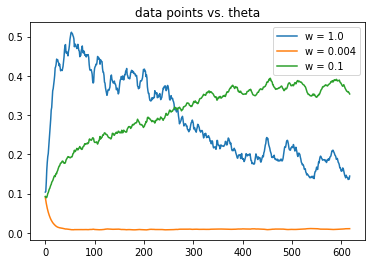


Sum of background rates w/o negative values: 2.16009941948471


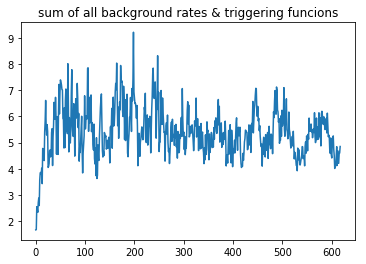

Hour vector sum: 
0.9999999999999993


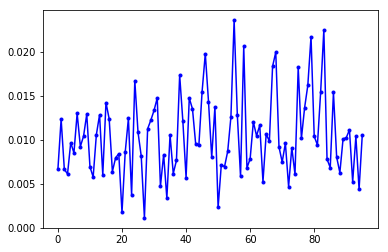

Day vector sum: 
1.0000000000001696


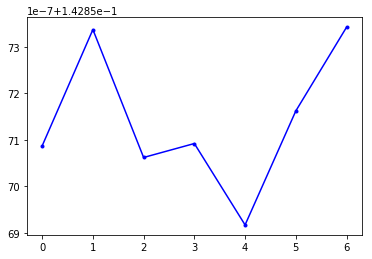

In [11]:
testing.param_examine()